In [2]:
#import Histogram as hst
import NumpyClasses as npc
import numpy as np
import matplotlib.pyplot as plt
import utils as u
import 

In [3]:
import importlib

In [176]:
importlib.reload(npc)

<module 'NumpyClasses' from '/Users/roberto/humanroot/utils/PyLHEanalysis/NumpyClasses.py'>

In [94]:
importlib.reload(u)

<module 'utils' from '/Users/roberto/scriptbelt/utils.py'>

### 1D constructors

In [52]:
hAtInit = hst.Histogram(counts=[11,12,13])

In [53]:
hAtInit.counts

array([11, 12, 13])

In [54]:
hAtInit.uncertainties

array([], dtype=float64)

In [21]:
h1 = hst.Histogram()

In [28]:
h1.values=np.array([100,16,9])

In [23]:
h2 = hst.Histogram()

In [43]:
h2.values=4*np.array([100,16,9])

In [44]:
h12=h1.ratio(h2,uncertainties="Gauss")

In [45]:
h12.values

array([0.25, 0.25, 0.25])

In [46]:
h12.uncertainties

array([0.02795085, 0.06987712, 0.0931695 ])

In [48]:
0.25*np.sqrt(1/100+1/400)

0.02795084971874737

In [34]:
??NumpyClasses.Numpy1DHistogramData

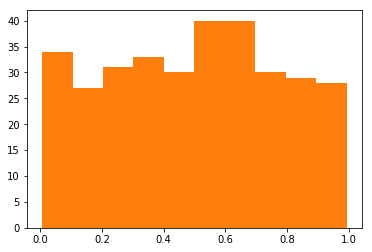

In [78]:
data = np.random.rand(322)
# make the histogram with NumPy
nph = np.histogram( data ) 
# then create a 1DHistogramData holder from the tuple output of np.histogram
h1d = NumpyClasses.Numpy1DHistogramData(tup = nph )
# make the same histogram from Matplotlib
mplh= plt.hist( data )
# create the 1DHistogramData from the tuple output (which now has the "patches" output as well)
h1dmpl = NumpyClasses.Numpy1DHistogramData(tup = mplh )
# the same creation of Histogram objects can be carried out on the derived class Histogram, which inherits from 1DHistogramData 
nph = np.histogram( data ) 
hsimplenp = hst.Histogram(tup = nph )

mplh= plt.hist( data )
h1dmplsimple = hst.Histogram(tup = mplh )

###### Can check the histograms contain the same things

In [72]:
h1d.bins

array([0.00247947, 0.10177423, 0.20106898, 0.30036373, 0.39965848,
       0.49895324, 0.59824799, 0.69754274, 0.79683749, 0.89613225,
       0.995427  ])

In [73]:
h1dmpl.bins

array([0.00247947, 0.10177423, 0.20106898, 0.30036373, 0.39965848,
       0.49895324, 0.59824799, 0.69754274, 0.79683749, 0.89613225,
       0.995427  ])

In [74]:
hsimplenp.bins

array([0.00247947, 0.10177423, 0.20106898, 0.30036373, 0.39965848,
       0.49895324, 0.59824799, 0.69754274, 0.79683749, 0.89613225,
       0.995427  ])

In [75]:
h1dmplsimple.bins

array([0.00247947, 0.10177423, 0.20106898, 0.30036373, 0.39965848,
       0.49895324, 0.59824799, 0.69754274, 0.79683749, 0.89613225,
       0.995427  ])

In [76]:
h1d.counts

array([37, 30, 39, 39, 30, 32, 28, 32, 33, 22])

In [77]:
h1dmplsimple.counts

array([37., 30., 39., 39., 30., 32., 28., 32., 33., 22.])

### Multiple Histograms

In [166]:
data2 =[ np.random.power(i,10000) for i in [2,4,6] ] # 3 data samples of which I can make a histogram

plot the data with Matplotlib as histogram

In [155]:
def _hist(data,bins,label=None,histtype='step',**kwargs):
    
    ##############################################
    def make_label(labels,h):
        ##############################################
        try:
            return labels[h]
        except IndexError:
            return ""
        except TypeError:
            return ""
        
    mplHistoMulplipleTuple = plt.hist( data ,histtype=histtype, bins=bins,label=label,**kwargs)
    histos = npc.Numpy1DHistogramsData(tup = mplHistoMulplipleTuple)

    if label != None:
        plt.legend(bbox_to_anchor=[1,1])
        for h in range(len(histos.histograms) ):
            histos.histograms[h].label = make_label(label,h)
    return histos

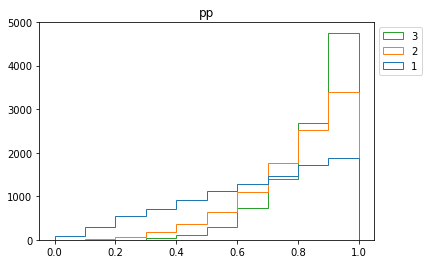

In [177]:
_histos = _hist(data2,u.arange(0,1,0.1),label=['1','2','3'],histtype='step')
plt.title("pp");

In [178]:
_histos.histograms[2].label

'3'

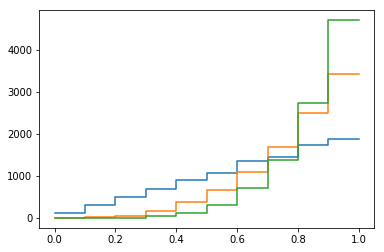

In [181]:
npc.histoPlots(histos)#,fmt='o')

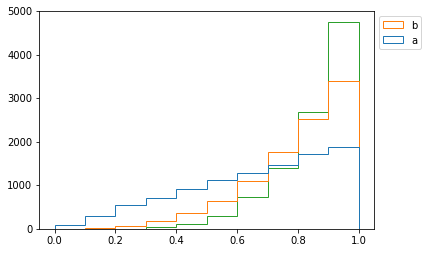

In [180]:
mplHistoMulplipleTuple = plt.hist( data2 , histtype='step', bins=u.arange(0,1,0.1),label=["a","b"])
plt.legend(bbox_to_anchor=[1,1])

save the plot as histograms in a NumpyClasses object

In [173]:
histos = npc.Numpy1DHistogramsData(tup = mplHistoMulplipleTuple)

plot again only a subset of the histograms

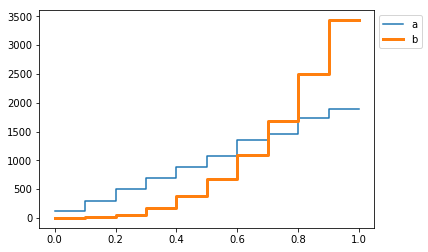

In [108]:
ax = npc.histoPlot(histos.histograms[0],label='a')
npc.histoPlot(histos.histograms[1],linewidth=3, ax=ax,label='b')
ax.legend(bbox_to_anchor=[1,1])

plot them all with a specific function

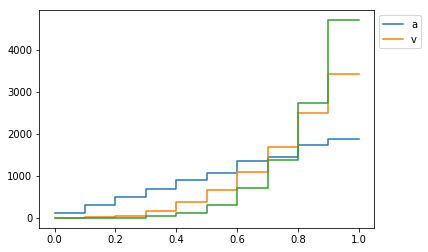

In [109]:
npc.histoPlots(histos,labels=['a','v'])#,fmt='o')

plot a subset with a function

compute the ratio of the histograms and compute uncertainties assuming the total number of points in each histogram is $10^4$

In [110]:
histosRatios=histos.ratio(wrt=0,uncertainties=10000)

/Users/roberto/humanroot/utils/PyLHEanalysis/NumpyClasses.py:141: RuntimeWarning: invalid value encountered in true_divide
  self.counts=tup[0]


plot the histograms again one by one by hand

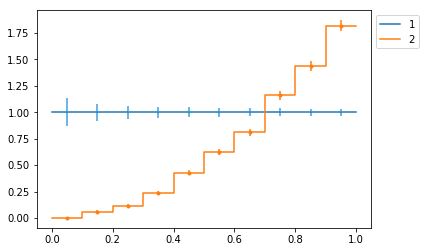

In [113]:
ax = npc.histoPlot(histosRatios.histograms[0],fmt=',',label='1')
npc.histoPlot(histosRatios.histograms[1],lighter_error=1,fmt='.',ax=ax,label='2')
plt.legend(bbox_to_anchor=[1,1])

plot all of them with a function

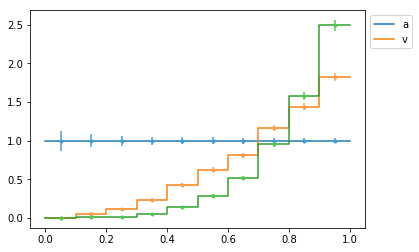

In [120]:
npc.histoPlots(histosRatios,labels=['a','v'])#,fmt='o')

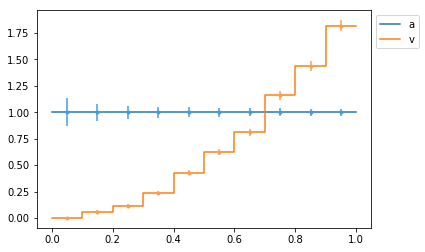

In [121]:
npc.histoPlots(histosRatios,subset=[0,1],labels=['a','v'])#,fmt='o')

#### Check some uncertainties

In [278]:
histosRatios.histograms[0].uncertainties

array([0.15249857, 0.08377078, 0.06213698, 0.05333807, 0.04819627,
       0.04269841, 0.03891021, 0.03702434, 0.03450328, 0.03170213])

In [279]:
histosRatios.histograms[1].uncertainties

array([       nan, 0.01534936, 0.01579592, 0.02074057, 0.02628963,
       0.02973056, 0.03551237, 0.04216586, 0.04554875, 0.04846583])

In [280]:
histos.histograms[1].counts

array([   0.,   18.,   60.,  171.,  361.,  663., 1168., 1731., 2407.,
       3421.])

In [281]:
histos.histograms[0].counts

array([  86.,  285.,  518.,  703.,  861., 1097., 1321., 1459., 1680.,
       1990.])

In [284]:
c1=1990
c2=3421
print(c2/c1 * np.sqrt(1/np.sqrt(c2)**2 + 1/np.sqrt(c1)**2))
del c1, c2

0.04846583388481339


### Demo of the Class inheritance, deprecated

In [102]:
_r=hst.Histogram(super=histos.histograms[0]).ratio(hst.Histogram(super=histos.histograms[1]))

In [103]:
_r.counts

array([1.2       , 0.84210526, 1.06896552, 1.02941176, 0.6       ,
       1.40740741, 1.32142857, 1.25      , 0.69444444, 0.85714286])